In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv")
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df = df.dropna()
print("After dropping missing values:", df.shape)

After dropping missing values: (7043, 21)


In [4]:
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


In [5]:
le = LabelEncoder()

for col in df.select_dtypes(include="object").columns:
    df[col] = le.fit_transform(df[col])

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


In [6]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

X_train.shape, X_test.shape

((5282, 20), (1761, 20))

In [7]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42
)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [8]:
y_pred = rf.predict(X_test)

print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred):.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

Random Forest Accuracy: 0.79

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1282
           1       0.71      0.40      0.51       479

    accuracy                           0.79      1761
   macro avg       0.76      0.67      0.69      1761
weighted avg       0.78      0.79      0.77      1761


Confusion Matrix:
 [[1203   79]
 [ 289  190]]


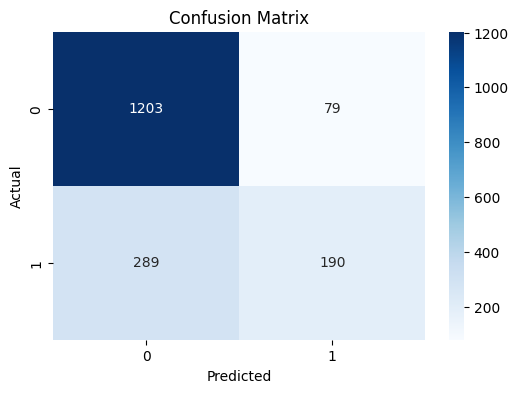

In [9]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

/tmp/ipython-input-881581577.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_imp, y=feature_imp.index, palette="viridis")


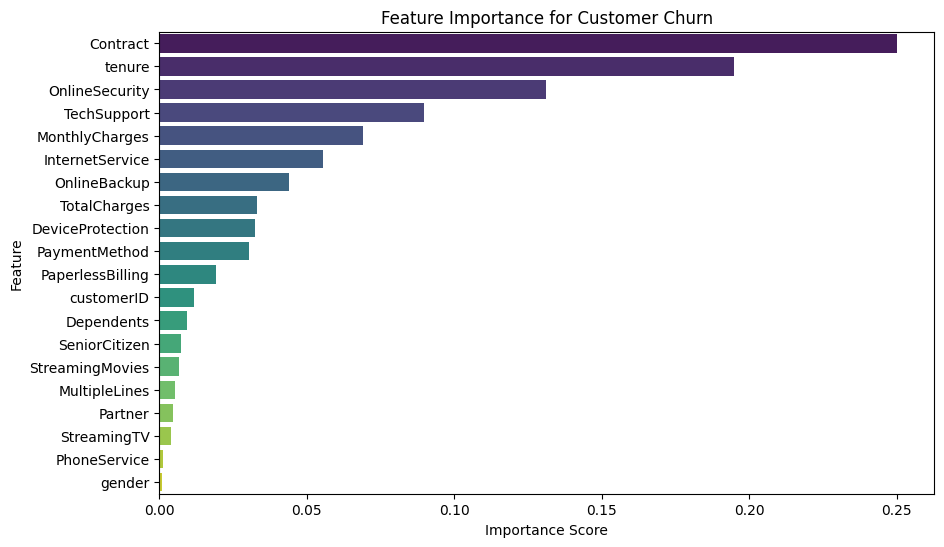

In [10]:
feature_imp = pd.Series(rf.feature_importances_, index=X.columns)
feature_imp = feature_imp.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index, palette="viridis")
plt.title("Feature Importance for Customer Churn")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

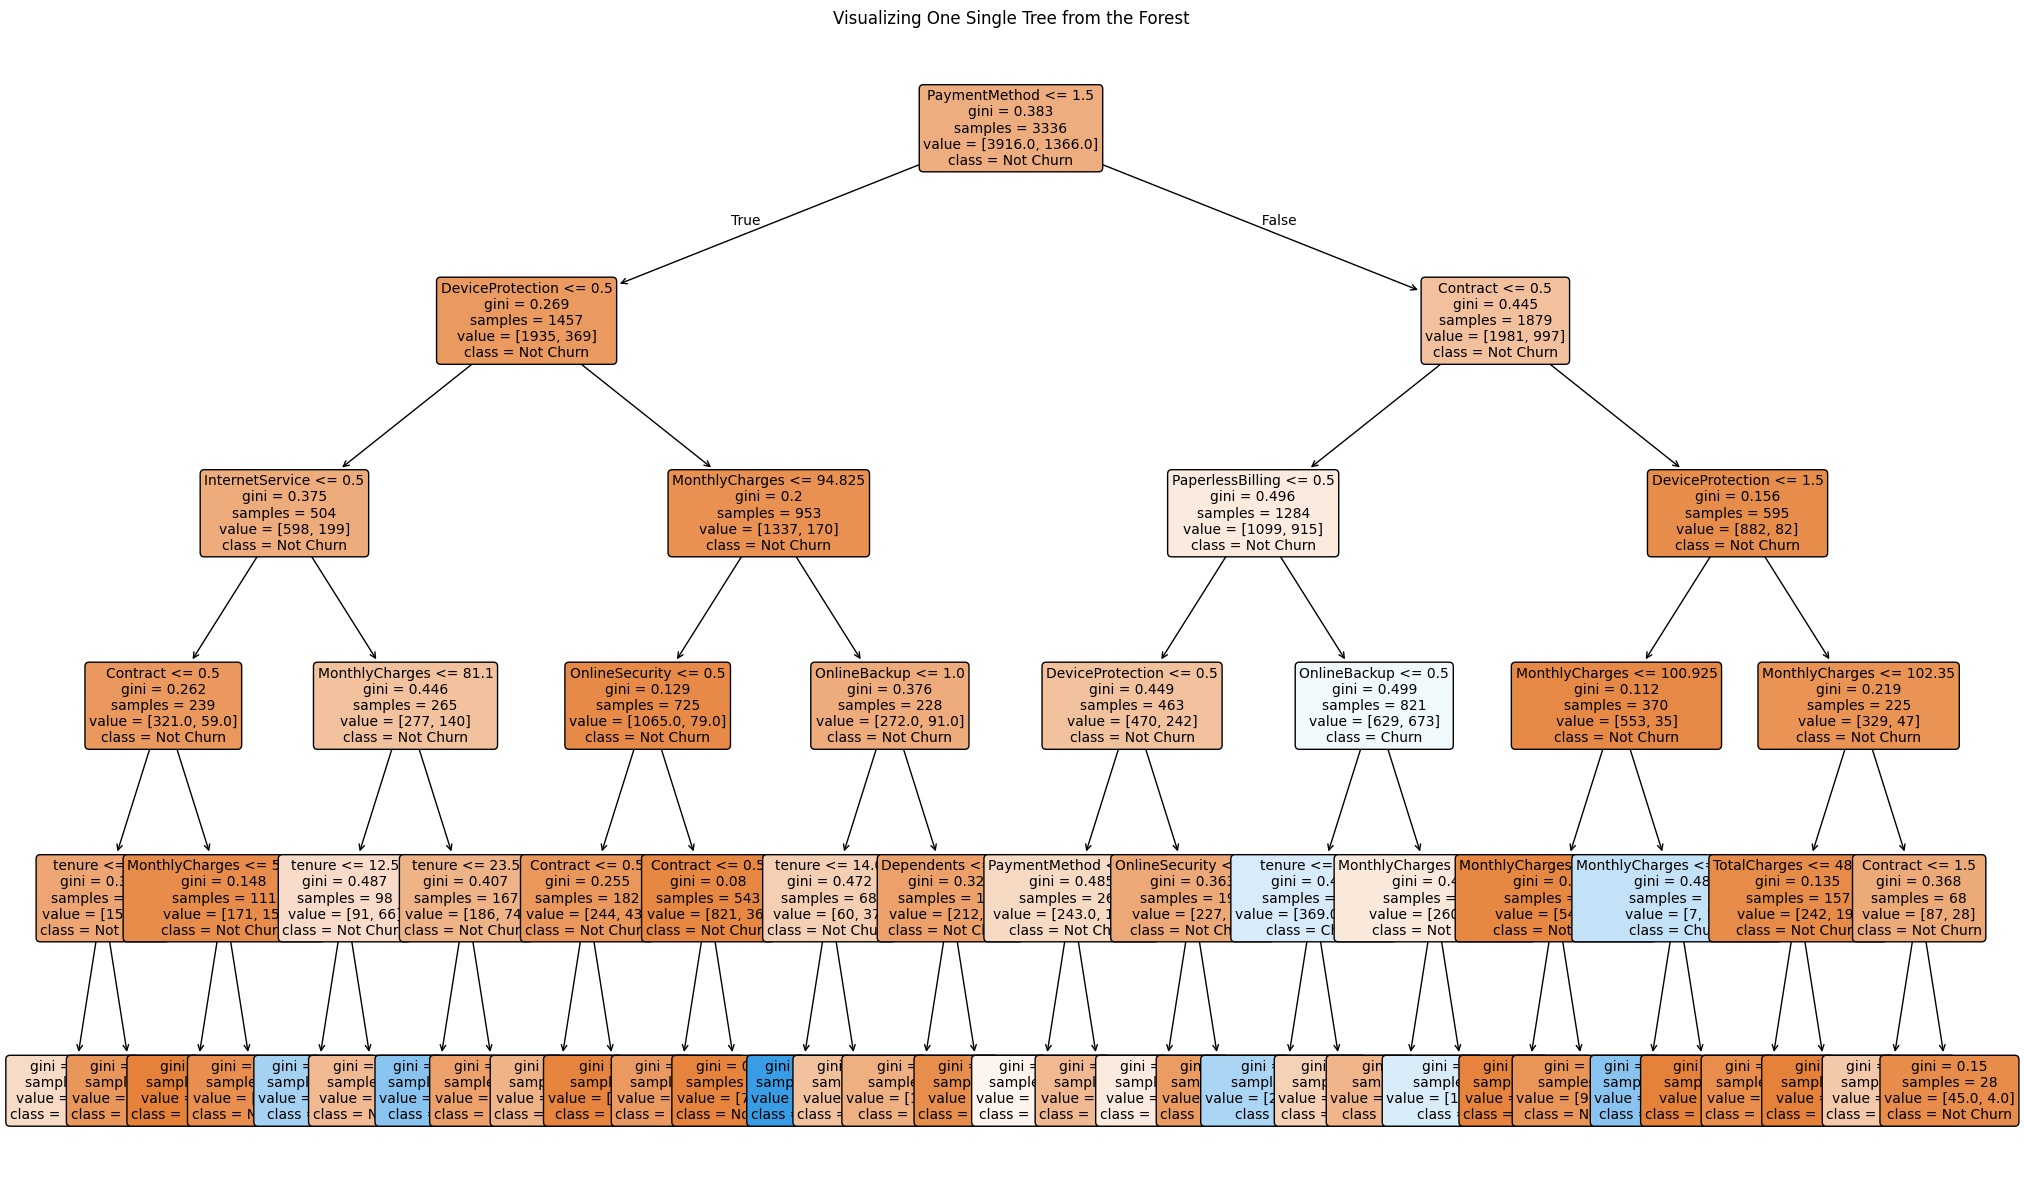

In [11]:
plt.figure(figsize=(25, 15))

single_tree = rf.estimators_[0]

plot_tree(
    single_tree,
    feature_names=X.columns,
    class_names=["Not Churn", "Churn"],
    filled=True,
    rounded=True,
    fontsize=10
)

plt.title("Visualizing One Single Tree from the Forest")
plt.show()
